# Sample code for persistence of connected sets
by Rich Sowers, 2017-03-04

In [7]:
import numpy
import itertools
%matplotlib notebook
import matplotlib.pyplot as plt

nodes are labelled 1 to N
L[n,nn] is value of Link[n,nn]
L[n,nn]=numpy.nan if there is no link
Note:  High values are bax

In [8]:
N=8
indices=list(range(N))
L=numpy.full((N,N),numpy.nan,dtype=float)
L[0,1]=8
L[0,2]=2
L[1,4]=1
L[4,6]=3
L[4,7]=7
L[3,5]=10

In [9]:
# for level ell, connect (with True of False) nodes n and nn if L[n,nn] or L[nn,n] is >= ell.
def make_connectivity(ell):
    temp=numpy.array([[((L[r,c]>=ell) or (L[c,r]>=ell)) for c in indices] for r in indices])
    return temp


In [10]:
# enumerate connected components as a list of sorted lists
# remove singletons
#use depth first search; see http://stackoverflow.com/questions/21078445/find-connected-components-in-a-graph
def find_connectedcomponents(Connectivity):
    #M[n,nn]=True if there is a link from n to nn
    visited=numpy.full(N,False,dtype=bool)
    #keeps track of visited vertices
    def dfs(n,myset):
        for nn in indices:
            if (Connectivity[n,nn] and not visited[nn]):
                #visit unvisited vertices which are connected to n
                visited[nn]=True
                myset.add(nn)
                dfs(nn,myset)
                
    components=[]
    for n in indices:
        if (not visited[n]):
            visited[n]=True
            temp=set([n])
            dfs(n,temp)
            if (len(temp)>1): #don't add singleton [n]
                components.append(sorted(temp))
            
    return components
        
    
    
Connectivity=make_connectivity(4)
print(Connectivity)
components=find_connectedcomponents(Connectivity)
print("connected components: ",components)
print("number of components: ",len(components))
        

[[False  True False False False False False False]
 [ True False False False False False False False]
 [False False False False False False False False]
 [False False False False False  True False False]
 [False False False False False False False  True]
 [False False False  True False False False False]
 [False False False False False False False False]
 [False False False False  True False False False]]
connected components:  [[0, 1], [3, 5], [4, 7]]
number of components:  3


In [11]:
#list different values in L
values=sorted(set([value for value in numpy.ndarray.flatten(L) if not numpy.isnan(value)]))
values_reversed=sorted(values,reverse=True)
print(values_reversed)

[10.0, 8.0, 7.0, 3.0, 2.0, 1.0]


merge barcodes by minimal index

In [12]:
#organize data into barcdoes
barcodes={}
for v in values_reversed:
    Connectivity=make_connectivity(v)
    components=find_connectedcomponents(Connectivity)
    print("\n---- v=",v," ----")
    print("connected components: ",components)
    print("number of components: ",len(components))
    for c in components:
        #use first element of connected component as key to organize connected components
        #put level into list
        key=str(c[0])
        if key not in barcodes:
            barcodes[key]=[]
        barcodes[key].append(v)
    

print(barcodes)
for key in list(barcodes.keys()):
    #find interval of values
    temp=barcodes[key]
    barcodes[key]=(min(temp),max(temp))
    
print(barcodes)



---- v= 10.0  ----
connected components:  [[3, 5]]
number of components:  1

---- v= 8.0  ----
connected components:  [[0, 1], [3, 5]]
number of components:  2

---- v= 7.0  ----
connected components:  [[0, 1], [3, 5], [4, 7]]
number of components:  3

---- v= 3.0  ----
connected components:  [[0, 1], [3, 5], [4, 6, 7]]
number of components:  3

---- v= 2.0  ----
connected components:  [[0, 1, 2], [3, 5], [4, 6, 7]]
number of components:  3

---- v= 1.0  ----
connected components:  [[0, 1, 2, 4, 6, 7], [3, 5]]
number of components:  2
{'4': [7.0, 3.0, 2.0], '3': [10.0, 8.0, 7.0, 3.0, 2.0, 1.0], '0': [8.0, 7.0, 3.0, 2.0, 1.0]}
{'4': (2.0, 7.0), '3': (1.0, 10.0), '0': (1.0, 8.0)}


sort by length of barcode

In [13]:
#sort keys by length of barcode
def sortfcn(mykey):
    (a,b)=barcodes[mykey]
    return b-a

sortedkeys=sorted(barcodes.keys(),key=sortfcn,reverse=True)
print(sortedkeys)

['3', '0', '4']


<IPython.core.display.Javascript object>


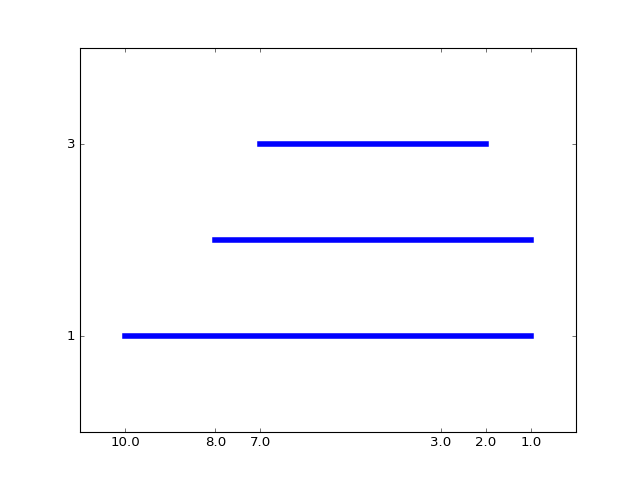

In [14]:
#plot barcode
#reverse axis; how long do high values persist?
yvals=numpy.array(range(len(sortedkeys)))+1
Nyvals=2
yvals=[y for y in yvals if y%Nyvals==1]
for n,key in enumerate(sortedkeys):
    (a,b)=barcodes[key]
    #print(n,"  ",key, " ",interval)
    plt.plot([a,b],[n+1,n+1],linewidth=5,color='blue')
    
plt.xlim((min(values)-1,max(values)+1))
plt.ylim((0,len(barcodes.keys())+1))
plt.yticks(yvals,yvals)
plt.xticks(values,values)
plt.gca().invert_xaxis()
plt.show()



merge barcodes by oldest

In [ ]:
barcodes=[]
for v in values_reversed:
    Connectivity=make_connectivity(v)
    components=find_connectedcomponents(Connectivity)
    print("\n---- v=",v," ----")
    print("connected components: ",components)
    print("number of components: ",len(components))
    for c in components:
        cset=frozenset(c)

        merged=False
        for n,b in enumerate(barcodes):
            if not cset.isdisjoint(b["set"]):
                merged=True
                #merge c into barcode
                #need to reference original list to change it
                barcodes[n]["set"]=c
                barcodes[n]["stop"]=v
                break
                
        if not merged:
            barcodes.append({"start":v,"stop":v,"set":c})
    
    print("barcodes=",barcodes)
    
print("final:",barcodes)

In [ ]:
def barcodelength(mydict):
    return mydict["stop"]-mydict["start"]

sortedbarcodes=sorted(barcodes,key=barcodelength)
print(sortedbarcodes)

sort barcodes by length

In [ ]:
yvals=numpy.array(range(len(sortedbarcodes)))+1
Nyvals=2
yvals=[y for y in yvals if y%Nyvals==1]

for n,b in enumerate(sortedbarcodes):
    (A,B)=(b["start"],b["stop"])
    #print(n,"  ",key, " ",interval)
    plt.plot([A,B],[n+1,n+1],linewidth=5,color='blue')
    
plt.xlim((min(values)-1,max(values)+1))
plt.ylim((0,len(sortedbarcodes)+1))
plt.yticks(yvals,yvals)
plt.xticks(values,values)
plt.gca().invert_xaxis()
plt.show()